In [5]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [6]:
path = "./Sales_Data"
all_season_df = pd.DataFrame()
for file in os.listdir(path):
    df = pd.read_csv(f"{path}/{file}")
    all_season_df = pd.concat([all_season_df, df])
all_season_df



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
13617,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
13618,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
13619,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
13620,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


In [7]:
all_season_df = all_season_df.dropna(how="all")
all_season_df[all_season_df.isnull().any(axis=1)]


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [8]:
all_season_df = all_season_df[all_season_df['Order ID'] != 'Order ID']


In [9]:
all_season_df['Month'] = all_season_df['Order Date'].str[0:2]
all_season_df['Month'] = all_season_df['Month'].astype('int8')
all_season_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


In [10]:
all_season_df['Order ID'] = all_season_df['Order ID'].astype('int64')
all_season_df['Price Each'] = all_season_df['Price Each'].astype('float64')
all_season_df['Quantity Ordered'] = all_season_df['Quantity Ordered'].astype('int64')

In [11]:
all_season_df.dtypes


Order ID              int64
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                  int8
dtype: object

In [12]:
all_season_df['Sales'] = all_season_df['Price Each'] * all_season_df['Quantity Ordered']

Another way
all_season_df['City'] = all_season_df['Purchase Address'].apply(lambda add: add.split(",")[1])

In [13]:
def get_city(add):
    return add.split(',')[1]


def get_state(add):
    return add.split(',')[2].split(' ')[1]


all_season_df['City'] = all_season_df['Purchase Address'].apply(lambda add: f'{get_city(add)}, {get_state(add)}')
all_season_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,"New York City, NY"
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,"New York City, NY"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,"New York City, NY"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,"San Francisco, CA"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,"Atlanta, GA"


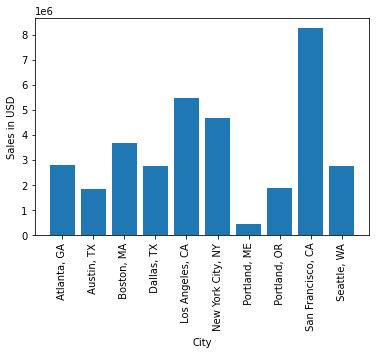

In [14]:
best_sales = all_season_df.groupby('City').sum()['Sales']
# best_sales.sort_index(ascending=False)

cities = [city for city, df in all_season_df.groupby('City')]
plt.bar(cities, best_sales)
plt.xticks(cities, rotation='vertical')
plt.ylabel("Sales in USD")
plt.xlabel("City")
plt.show()


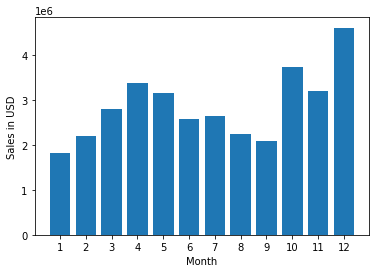

In [15]:
best_sales = all_season_df.groupby('Month').sum()['Sales']
# best_sales.sort_index(ascending=False)

months = range(1, 13)
plt.bar(months, best_sales)
plt.xticks(months)
plt.ylabel("Sales in USD")
plt.xlabel("Month")
plt.show()


In [16]:
all_season_df['Order Date'] = pd.to_datetime(all_season_df['Order Date'])
all_season_df['Hour'] = all_season_df['Order Date'].dt.hour
all_season_df['Minute'] = all_season_df['Order Date'].dt.minute
all_season_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,"New York City, NY",0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,"New York City, NY",7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,"New York City, NY",18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,"San Francisco, CA",15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,"Atlanta, GA",12,38


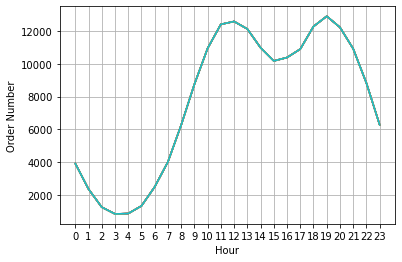

In [17]:
hours = range(0, 24)
plt.plot(hours, all_season_df.groupby(['Hour']).count())
plt.xticks(hours)
plt.ylabel('Order Number')
plt.xlabel('Hour')
plt.grid()
plt.show()

In [18]:
df = all_season_df.copy()
df = df[df['Order ID'].duplicated(keep=False)]
df['Combo'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df = df[['Order ID', 'Combo']].drop_duplicates().reset_index(drop=True)
df.head()

,Order ID,Combo
0,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
1,295698,"Vareebadd Phone,USB-C Charging Cable"
2,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
3,295726,"iPhone,Lightning Charging Cable"
4,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"


In [19]:
from collections import Counter
from itertools import combinations

count = Counter()

for row in df["Combo"]:
    row_lst = row.split(',')
    count.update(Counter(combinations(row_lst, 2)))
i = 1
for key, value in count.most_common(10):
    print(f'{i}: {key[0]} and {key[1]} with {value} times orders\n')
    i += 1

1: iPhone and Lightning Charging Cable with 1005 times orders

2: Google Phone and USB-C Charging Cable with 987 times orders

3: iPhone and Wired Headphones with 447 times orders

4: Google Phone and Wired Headphones with 414 times orders

5: Vareebadd Phone and USB-C Charging Cable with 361 times orders

6: iPhone and Apple Airpods Headphones with 360 times orders

7: Google Phone and Bose SoundSport Headphones with 220 times orders

8: USB-C Charging Cable and Wired Headphones with 160 times orders

9: Vareebadd Phone and Wired Headphones with 143 times orders

10: Lightning Charging Cable and Wired Headphones with 92 times orders



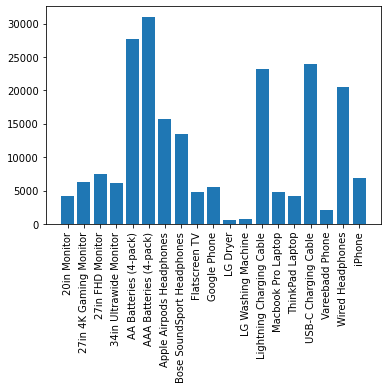

In [20]:
product_df = all_season_df.groupby('Product')
product_sum = product_df["Quantity Ordered"].sum()
products = [k for k, df in product_df]
plt.bar(products, product_sum)
plt.xticks(products, rotation='vertical')
plt.show()




<ipython-input-27-a6836da0ecec>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)
<ipython-input-27-a6836da0ecec>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


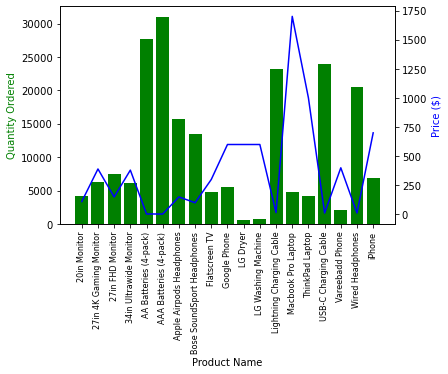

In [27]:
prices = product_df['Price Each'].mean()
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, product_sum, color='g')
ax2.plot(products, prices, 'b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)

fig.show()